[View in Colaboratory](https://colab.research.google.com/github/karangautam/Learning-Samples/blob/master/fastai_lesson_1.ipynb)

In [0]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!pip install fastai

    100% |████████████████████████████████| 122kB 8.9MB/s 
    71% |██████████████████████▉         | 355.0MB 36.6MB/s eta 0:00:04

    100% |████████████████████████████████| 496.4MB 23kB/s 
    100% |████████████████████████████████| 51kB 11.3MB/s 
    100% |████████████████████████████████| 61kB 9.2MB/s 
    100% |████████████████████████████████| 112kB 9.9MB/s 
    100% |████████████████████████████████| 3.4MB 5.4MB/s 
    100% |████████████████████████████████| 1.5MB 3.3MB/s 


    100% |████████████████████████████████| 2.2MB 3.1MB/s 
    100% |████████████████████████████████| 51kB 12.5MB/s 
    100% |████████████████████████████████| 184kB 21.7MB/s 
    100% |████████████████████████████████| 13.7MB 2.0MB/s 
    100% |████████████████████████████████| 71kB 15.0MB/s 
    100% |████████████████████████████████| 112kB 19.9MB/s 
    100% |████████████████████████████████| 92kB 8.2MB/s 
    100% |████████████████████████████████| 81kB 16.1MB/s 
  Running setup.py bdist_wheel for feather-format ... - done
  Stored in directory: /content/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
  Running setup.py bdist_wheel for bcolz ... -

 \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
  Stored in directory: /content/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
  Running setup.py bdist_wheel for pandas-summary ... - done
  Stored in directory: /content/.cache/pip/wheels/86/a9/6b/36b727a9ec687dac08bd3d0501cddd7b1a223943513eb04a03
  Running setup.py bdist_wheel for torchtext ... - \ done
  Stored in directory: /content/.cache/pip/wheels/42/a6/f4/b267328bde6bb680094a0c173e8e5627ccc99543abded97204
Successfully built feather-format bcolz pandas-summary torchtext
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


In [0]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [0]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [7]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"karangautam","key":"7886fb75a6cbe6a3bf59d84dcbab4904"}'}

In [8]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 Jul 14 21:27 kaggle.json


In [9]:
# Next, install the Kaggle API client.
!pip install -q kaggle

torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 /content/.kaggle/kaggle.json

In [12]:
# List available datasets.
!kaggle competitions list

ref                                              deadline             category            reward  teamCount  userHasEntered  
-----------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
house-prices-advanced-regression-techniques      2030-01-01 00:00:00  Getting Started  Knowledge       4984            True  
digit-recognizer                                 2030-01-01 00:00:00  Getting Started  Knowledge       2697            True  
titanic                                          2030-01-01 00:00:00  Getting Started  Knowledge      10842            True  
imagenet-object-localization-challenge           2029-12-31 07:00:00  Research         Knowledge         20           False  
competitive-data-science-predict-future-sales    2019-01-01 23:59:00  Playground           Kudos        980           False  
flavours-of-physics-kernels-only                 2018-09-24 23:59:00  Playground       Knowledge         19           

In [13]:
!kaggle competitions list -s dogs

ref                                 deadline             category       reward  teamCount  userHasEntered  
----------------------------------  -------------------  ----------  ---------  ---------  --------------  
dogs-vs-cats                        2014-02-01 23:59:00  Playground       Swag        215            True  
dogs-vs-cats-redux-kernels-edition  2017-03-02 23:59:00  Playground  Knowledge       1314            True  
dog-breed-identification            2018-02-26 23:59:00  Playground      Kudos       1286            True  
seizure-prediction                  2014-11-17 23:59:00  Research      $25,000        504           False  


In [14]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition 

 98%|███████████████████████████████████████ | 265M/271M [00:03<00:00, 91.2MB/s]
100%|████████████████████████████████████████| 271M/271M [00:03<00:00, 91.8MB/s]
 98%|████████████████████████████████████████▎| 535M/544M [00:05<00:00, 105MB/s]
100%|████████████████████████████████████████| 544M/544M [00:05<00:00, 96.6MB/s]
  0%|                                                | 0.00/111k [00:00<?, ?B/s]
100%|█████████████████████████████████████████| 111k/111k [00:00<00:00, 106MB/s]


In [15]:
from subprocess import check_output
print(check_output(["ls", "../content/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition"]).decode("utf8"))
#print(check_output(["ls", "../content/.kaggle/competitions/whale-categorization-playground/train/train"]).decode("utf8"))


sample_submission.csv
test.zip
train.zip



In [0]:
import zipfile
zip_ref = zipfile.ZipFile("../content/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/train.zip", "r")
zip_ref.extractall("../content/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition")
zip_ref.close()

In [17]:
from subprocess import check_output
print(check_output(["ls", "../content/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition"]).decode("utf8"))
#print(check_output(["ls", "../content/.kaggle/competitions/whale-categorization-playground/train/train"]).decode("utf8"))
print(check_output(["ls", "../content/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/train"]).decode("utf8"))

sample_submission.csv
test.zip
train
train.zip

cat.0.jpg
cat.10000.jpg
cat.10001.jpg
cat.10002.jpg
cat.10003.jpg
cat.10004.jpg
cat.10005.jpg
cat.10006.jpg
cat.10007.jpg
cat.10008.jpg
cat.10009.jpg
cat.1000.jpg
cat.10010.jpg
cat.10011.jpg
cat.10012.jpg
cat.10013.jpg
cat.10014.jpg
cat.10015.jpg
cat.10016.jpg
cat.10017.jpg
cat.10018.jpg
cat.10019.jpg
cat.1001.jpg
cat.10020.jpg
cat.10021.jpg
cat.10022.jpg
cat.10023.jpg
cat.10024.jpg
cat.10025.jpg
cat.10026.jpg
cat.10027.jpg
cat.10028.jpg
cat.10029.jpg
cat.1002.jpg
cat.10030.jpg
cat.10031.jpg
cat.10032.jpg
cat.10033.jpg
cat.10034.jpg
cat.10035.jpg
cat.10036.jpg
cat.10037.jpg
cat.10038.jpg
cat.10039.jpg
cat.1003.jpg
cat.10040.jpg
cat.10041.jpg
cat.10042.jpg
cat.10043.jpg
cat.10044.jpg
cat.10045.jpg
cat.10046.jpg
cat.10047.jpg
cat.10048.jpg
cat.10049.jpg
cat.1004.jpg
cat.10050.jpg
cat.10051.jpg
cat.10052.jpg
cat.10053.jpg
cat.10054.jpg
cat.10055.jpg
cat.10056.jpg
cat.10057.jpg
cat.10058.jpg
cat.10059.jpg
cat.1005.jpg
cat.10060.jpg
cat.10061.

In [0]:
import os, shutil

In [0]:
original_dataset_dir = '../content/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/train'

In [0]:
base_dir = '../content/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/train'                 
#os.mkdir(base_dir)

In [0]:
#train_dir = os.path.join(base_dir, 'train')                                
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'valid')                      
os.mkdir(validation_dir)
#test_dir = os.path.join(base_dir, 'test')                                  
#os.mkdir(test_dir)

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')                           
os.mkdir(train_cats_dir)                                                   

train_dogs_dir = os.path.join(train_dir, 'dogs')                           
os.mkdir(train_dogs_dir)  

In [0]:
validation_cats_dir = os.path.join(validation_dir, 'cats')                 
os.mkdir(validation_cats_dir)                                              

validation_dogs_dir = os.path.join(validation_dir, 'dogs')                 
os.mkdir(validation_dogs_dir)                                              

#test_cats_dir = os.path.join(test_dir, 'cats')                             
#os.mkdir(test_cats_dir)                                                    

#test_dogs_dir = os.path.join(test_dir, 'dogs')                             
#os.mkdir(test_dogs_dir) 

In [0]:
fnames = ['cat.{}.jpg'.format(i) for i in range(10000)]                     
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(train_cats_dir, fname)                              
    shutil.copyfile(src, dst)      

In [0]:
fnames = ['cat.{}.jpg'.format(i) for i in range(10000, 12500)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(validation_cats_dir, fname)                         
    shutil.copyfile(src, dst)   

In [0]:
'''fnames = ['dog.{}.jpg'.format(i) for i in range(10000)]                     
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(train_dogs_dir, fname)                              
    shutil.copyfile(src, dst)     '''                                         
fnames = ['dog.{}.jpg'.format(i) for i in range(10000, 12500)]               
for fname in fnames:                                                       
    src = os.path.join(original_dataset_dir, fname)                        
    dst = os.path.join(validation_dogs_dir, fname)                         
    shutil.copyfile(src, dst)      

In [47]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
#print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
#print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 10000
total validation cat images: 2500
total training dog images: 10000
total validation dog images: 2500


In [0]:
PATH = '../content/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/train/'
sz=224

In [49]:
torch.cuda.is_available()

True

In [50]:
torch.backends.cudnn.enabled

True

In [51]:
os.listdir(PATH)

['dog.6543.jpg',
 'dog.9377.jpg',
 'cat.5597.jpg',
 'cat.5272.jpg',
 'dog.7980.jpg',
 'cat.10546.jpg',
 'cat.10160.jpg',
 'dog.7975.jpg',
 'dog.11362.jpg',
 'dog.5589.jpg',
 'cat.7752.jpg',
 'cat.1274.jpg',
 'cat.1151.jpg',
 'dog.180.jpg',
 'cat.8827.jpg',
 'dog.7308.jpg',
 'cat.10913.jpg',
 'cat.9363.jpg',
 'dog.9698.jpg',
 'cat.3326.jpg',
 'cat.10143.jpg',
 'cat.7219.jpg',
 'dog.3240.jpg',
 'dog.8599.jpg',
 'cat.9166.jpg',
 'cat.1637.jpg',
 'dog.4028.jpg',
 'cat.9936.jpg',
 'dog.8380.jpg',
 'cat.143.jpg',
 'dog.2316.jpg',
 'cat.7620.jpg',
 'cat.5188.jpg',
 'dog.6694.jpg',
 'dog.4218.jpg',
 'cat.8385.jpg',
 'cat.4476.jpg',
 'cat.6234.jpg',
 'cat.10712.jpg',
 'cat.10197.jpg',
 'dog.10005.jpg',
 'cat.5381.jpg',
 'cat.4847.jpg',
 'cat.7803.jpg',
 'cat.9416.jpg',
 'dog.3339.jpg',
 'dog.2798.jpg',
 'dog.6550.jpg',
 'dog.1588.jpg',
 'dog.4030.jpg',
 'cat.12352.jpg',
 'cat.2713.jpg',
 'dog.11049.jpg',
 'cat.10735.jpg',
 'cat.6134.jpg',
 'cat.11752.jpg',
 'dog.3361.jpg',
 'dog.5037.jpg',
 'do

In [52]:
os.listdir(f'{PATH}train')

['cats', 'dogs']

In [53]:
files = os.listdir(f'{PATH}validation/cats')[:5]
files

['cat.10546.jpg',
 'cat.10160.jpg',
 'cat.10913.jpg',
 'cat.10143.jpg',
 'cat.10712.jpg']

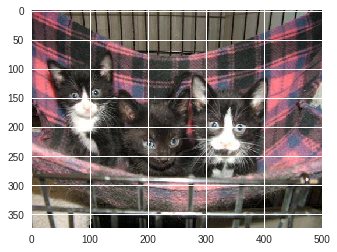

In [54]:
img = plt.imread(f'{PATH}validation/cats/{files[0]}')
plt.imshow(img);

In [55]:
img.shape

(374, 500, 3)

In [56]:
img[:4,:4]

array([[[ 59,  68,  77],
        [ 55,  62,  70],
        [ 57,  57,  67],
        [ 69,  61,  72]],

       [[ 79,  67,  81],
        [ 75,  61,  76],
        [ 74,  56,  70],
        [ 82,  58,  72]],

       [[107,  65,  89],
        [106,  62,  85],
        [105,  60,  81],
        [108,  59,  80]],

       [[121,  56,  86],
        [128,  62,  90],
        [136,  67,  95],
        [140,  67,  94]]], dtype=uint8)

In [57]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /content/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 50073288.30it/s]


100%|██████████| 79/79 [00:33<00:00,  2.35it/s]


epoch      trn_loss   val_loss   accuracy   
    0      0.053172   0.029904   0.9888    
    1      0.039619   0.030554   0.9904    



[array([0.03055]), 0.9904]

In [58]:
# This is the label for a val data
data.val_y

array([0, 0, 0, ..., 1, 1, 1])

In [59]:
# from here we know that 'cats' is label 0 and 'dogs' is label 1.
data.classes

['cats', 'dogs']

In [60]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(5000, 2)

In [61]:
log_preds[:10]

array([[ -0.0004 ,  -7.83332],
       [ -0.00006,  -9.73392],
       [ -0.00001, -11.66815],
       [ -0.     , -12.41319],
       [ -4.56146,  -0.0105 ],
       [ -0.31052,  -1.32076],
       [ -0.00086,  -7.06293],
       [ -0.     , -12.44146],
       [ -0.00141,  -6.56693],
       [ -0.00001, -11.63475]], dtype=float32)

In [0]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


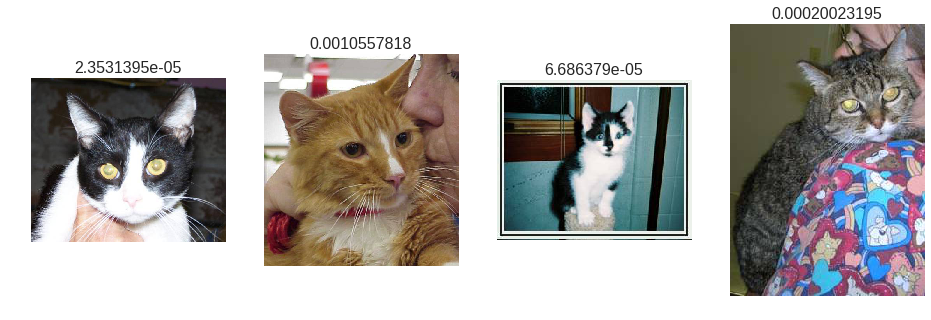

In [66]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


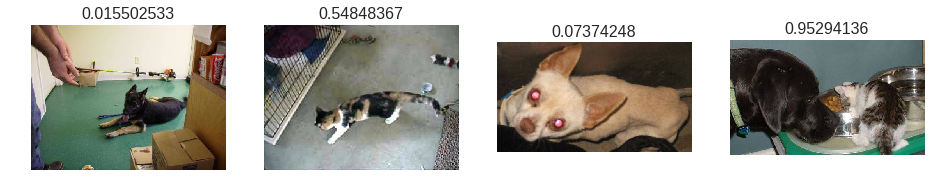

In [67]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [0]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct cats


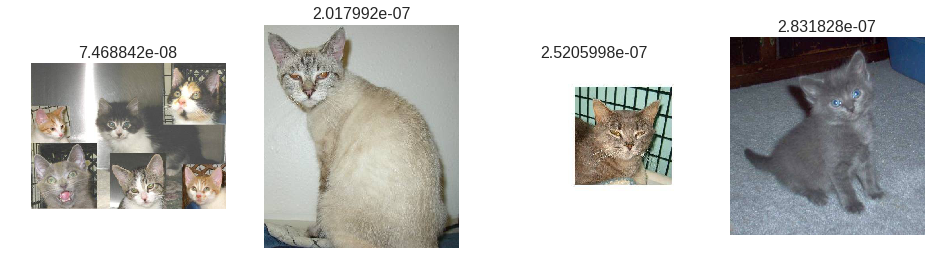

In [69]:
plot_val_with_title(most_by_correct(0, True), "Most correct cats")

Most correct dogs


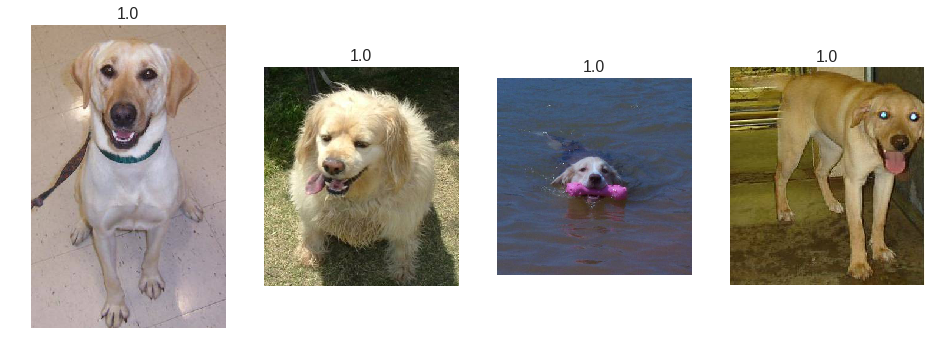

In [70]:
plot_val_with_title(most_by_correct(1, True), "Most correct dogs")

Most incorrect cats


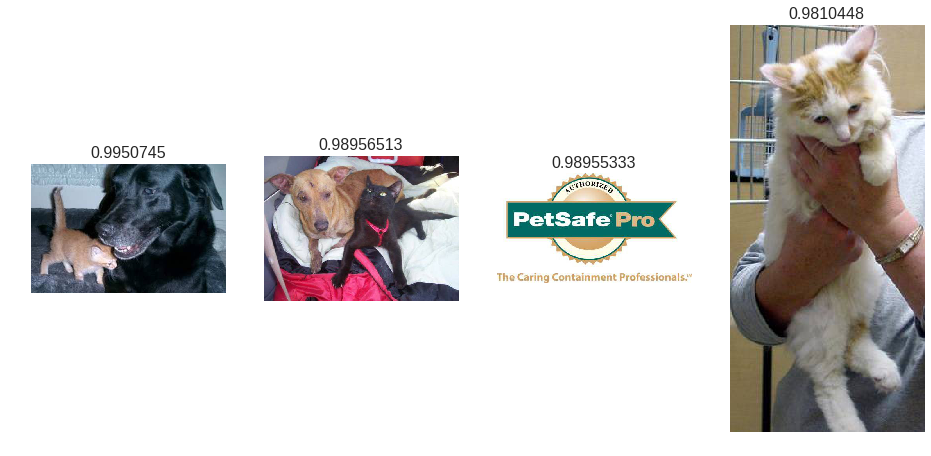

In [71]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


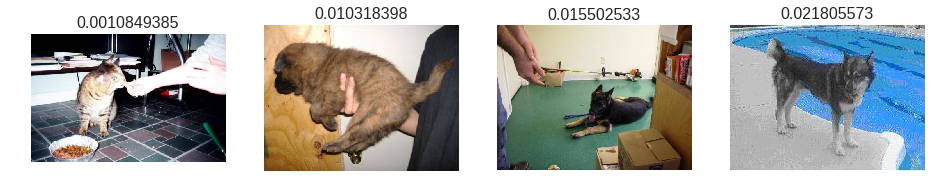

In [72]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

Most uncertain predictions


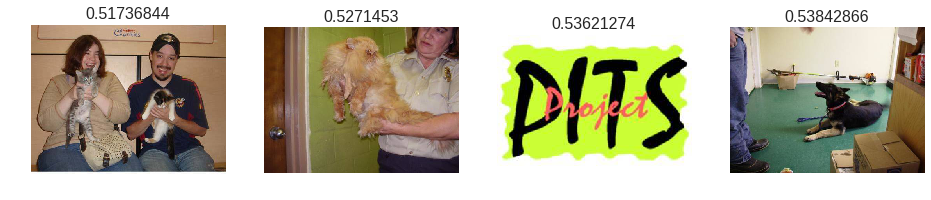

In [73]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

In [0]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [75]:
lrf=learn.lr_find()

 85%|████████▌ | 267/313 [00:06<00:01, 43.31it/s, loss=0.522]


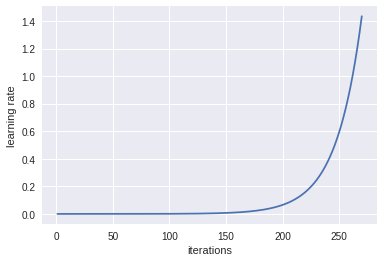

In [76]:
learn.sched.plot_lr()

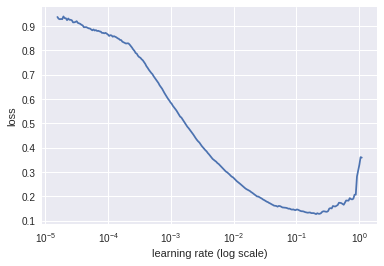

In [77]:
learn.sched.plot()

In [0]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [0]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [0]:
ims = np.stack([get_augs() for i in range(6)])

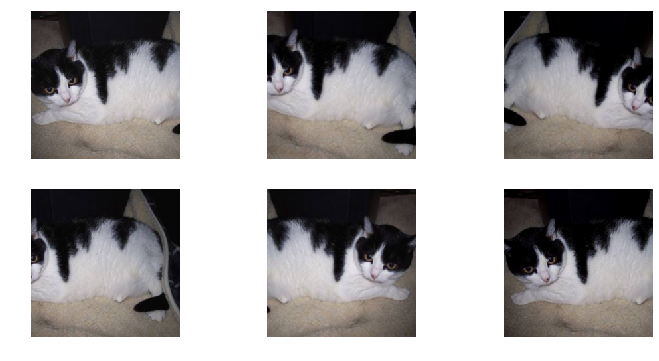

In [81]:
plots(ims, rows=2)

In [0]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [83]:
learn.fit(1e-2, 1)

epoch      trn_loss   val_loss   accuracy   
    0      0.048601   0.027796   0.9904    



[array([0.0278]), 0.9904]

In [0]:
learn.precompute=False

In [0]:
learn.fit(1e-2, 3, cycle_len=1)